In [98]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
cd /content/drive/MyDrive/data/img

/content/drive/MyDrive/data/img


In [100]:
import numpy as np

data = np.load('data_celeba.npz')
data

In [101]:
list(data)

['X_data', 'Y_data']

In [102]:
X = data['X_data']
X

array([[[[0.02352941, 0.04313725, 0.05490196],
         [0.01960784, 0.03921569, 0.05490196],
         [0.01977401, 0.03921569, 0.05114656],
         ...,
         [0.03529412, 0.0547381 , 0.05865736],
         [0.03137255, 0.05490196, 0.05882353],
         [0.03137255, 0.05490196, 0.06663343]],

        [[0.02352941, 0.04313725, 0.05490196],
         [0.02352941, 0.03921569, 0.05490196],
         [0.01960784, 0.03921569, 0.05098039],
         ...,
         [0.03137255, 0.05490196, 0.05898693],
         [0.03137255, 0.05490196, 0.05882353],
         [0.03137255, 0.05490196, 0.06271186]],

        [[0.02352941, 0.04313725, 0.05490196],
         [0.02352941, 0.03948109, 0.05490196],
         [0.01960784, 0.03921569, 0.05098039],
         ...,
         [0.03163334, 0.05490196, 0.06291127],
         [0.03529412, 0.05490196, 0.05909586],
         [0.03140347, 0.05490196, 0.06271186]],

        ...,

        [[0.15206002, 0.25429314, 0.44316818],
         [0.11639757, 0.21470911, 0.43367259]

In [103]:
y = data['Y_data']
y

array([[0, 0],
       [1, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int8)

In [104]:
np.shape(X), np.shape(y)

((2000, 72, 59, 3), (2000, 2))

In [105]:
np.unique(y)

array([0, 1], dtype=int8)

In [106]:
y[2]

array([1, 0], dtype=int8)

In [107]:
y_gender = y[:, 0]

In [108]:
len(y_gender)

2000

In [109]:
y_smile=y[:,1]

In [110]:
len(y_smile)

2000

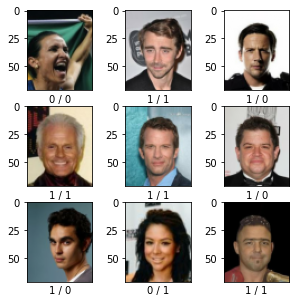

In [172]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    #plt.yticks([])
    plt.imshow(X[i])
    plt.xlabel(f'{y_gender[i]} / {y_smile[i]}')
plt.show()

In [112]:
# 0~1 값만 나오면 이미 스케일링 된 자료 임!
np.max(X), np.min(X)

# 추가 스케일링 작업을 할 경우 이미지가 없어지는 일이 생김(검정색 이미지가 나옴)

(1.0, 0.0)

In [113]:
np.unique(y)

array([0, 1], dtype=int8)

--x값--


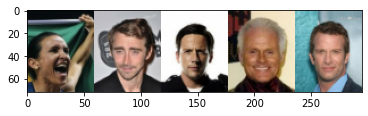

--y value--
[0 1 1 1 1] [0 1 0 1 1]


In [114]:
# 5개의 이미지를 수평으로 나란히 출력

print('--x값--')
plt.imshow(np.hstack(X[:5]))
plt.show()

print('--y value--')
print(y_gender[:5],y_smile[:5])

In [173]:
## 성별만 가지고 작업하기, x, y 데이터 셋 나누기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y_gender, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [116]:
# y데이터의 분할은 편향없이 잘 되었는가 확인작업

unique, counts = np.unique(y_train, return_counts=True)

unique_yt = dict(zip(unique, counts))
unique_yt

{0: 726, 1: 674}

In [117]:
# y데이터의 분할은 편향없이 잘 되었는가 확인작업

unique, counts = np.unique(y_val, return_counts=True)

unique_yv = dict(zip(unique, counts))
unique_yv

{0: 280, 1: 320}

In [118]:
import collections, numpy
collections.Counter(y_train)

Counter({0: 726, 1: 674})

In [119]:
# 날코딩으로 짜보기

cnt_0 = 0
cnt_1 = 0
for tmp in y_train:
  if tmp == 0:
    cnt_0 += 1
  elif tmp == 1:
    cnt_1 +=1
cnt_0, cnt_1

(726, 674)

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (72, 59, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 72, 59, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 59, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 36, 30, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 36, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 15, 128)      

In [122]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', # 원핫 인코딩 역할
             metrics = ['acc'])

In [123]:
history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
44/44 [==============================] - 44s 984ms/step - loss: 0.6612 - acc: 0.6043 - val_loss: 0.5762 - val_acc: 0.7333
Epoch 2/15
44/44 [==============================] - 43s 978ms/step - loss: 0.5340 - acc: 0.7293 - val_loss: 0.5245 - val_acc: 0.7367
Epoch 3/15
44/44 [==============================] - 43s 978ms/step - loss: 0.4736 - acc: 0.7793 - val_loss: 0.4846 - val_acc: 0.7750
Epoch 4/15
44/44 [==============================] - 43s 976ms/step - loss: 0.4670 - acc: 0.7821 - val_loss: 0.4883 - val_acc: 0.7717
Epoch 5/15
44/44 [==============================] - 43s 974ms/step - loss: 0.4276 - acc: 0.8093 - val_loss: 0.4549 - val_acc: 0.8050
Epoch 6/15
44/44 [==============================] - 43s 978ms/step - loss: 0.4007 - acc: 0.8257 - val_loss: 0.4635 - val_acc: 0.7767
Epoch 7/15
44/44 [==============================] - 43s 977ms/step - loss: 0.3635 - acc: 0.8443 - val_loss: 0.4150 - val_acc: 0.8083
Epoch 8/15
44/44 [==============================] - 43s 977ms/step - 

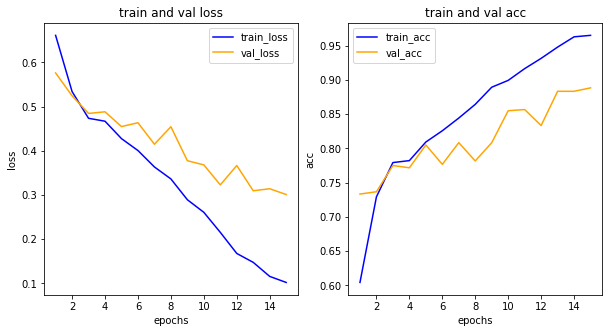

In [124]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

---x테스트---


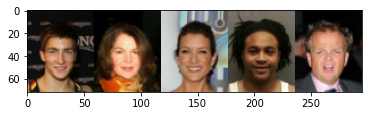

---y test value----
[1 0 0 1 1]
---y 예측값 value
1 male
0 female
0 female
1 male
1 male


In [127]:
# 테스트데이터셋

y_pred=model.predict(x_val[:5])

print('---x테스트---')
plt.imshow(np.hstack(x_val[:5]))
plt.show()

print('---y test value----')
print(y_val[:5])

class_names=['female','male']
print('---y 예측값 value')
for i in y_pred:
  print(np.argmax(i),class_names[np.argmax(i)])


In [143]:
# y_val 또는 y_test사진셋이 아닌 한장의 사진으로 보면
# model.predict(x_val[0]) 에러나옴
model.predict(x_val[0:1]) # 텐서 모델은 4개의 dim이어야 함.

np.shape(x_val[0]), np.shape(x_val[0:1])

((72, 59, 3), (1, 72, 59, 3))

## 사진 불러와서 직접 테스트 해보기
1. 리사이즈 (72,59)
2. 반드시 3채널이어야함(컬러파일) 72,59,3
3. 스케일링 0~1 사이값으로 제공된 NPZ로 작업할 경우

In [128]:
# 사진 직접 넣고 분석 해보기

from PIL import Image
img=Image.open('me.jpeg')
print(img.size)
np.shape(img)

(2316, 3088)


(3088, 2316, 3)

In [141]:
img_re=img.resize((59, 72))   # PIL은 너비, 높이로 나옴
np.shape(img_re)

(72, 59, 3)

In [138]:
# 스케일링전 데이터 확인
np.max(img_re)

# 255로 나누기

237

In [144]:
imgarr=np.array(img_re)/255
print(np.shape(imgarr))

(72, 59, 3)


In [145]:
# 최종 input값으로 만들기위해 reshape(1, 72, 59, 3) 으로 만들어줌
newX = imgarr.reshape(1,72,59,3)
np.shape(newX)

(1, 72, 59, 3)

In [154]:
# 테스트 해보기
class_names[np.argmax(model.predict(newX))]

'male'

In [ ]:
## 이자료는 과적합 해소 필요함
# 모델이 잘 될 경우
# model.save 해서 h5로 저장하거나
# fit 할대 epoch 단위로 체크포인트 저장을 해야 함

(72, 59, 3)
(72, 59, 3)
(1, 72, 59, 3)
male


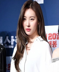

In [155]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리는 무엇일까요?
# 1. 리사이즈 (높이가 72, 너비가 59)  
# 2. 반드시 3채널이어야함.(컬러야함)   => 72,59,3
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이 부분은 스케일링 한 사람만 정확하게 할 수 있음.
#   => 여기서는 그냥 255로 나눈값임.
# 4. 텐서입력 shape로 변경해야함.  => (72,59,3) ==> (1,72,59,3)

from PIL import Image
img=Image.open('test1.jpg')
img=img.resize((59,72))   # PIL에서는 너비, 높이로 나옴.  텐서input은 높이,너비임
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
print(np.shape(newX))

print(class_names[np.argmax(model.predict(newX))])
img

(72, 59, 3)
(72, 59, 3)
(1, 72, 59, 3)
male


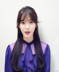

In [156]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리는 무엇일까요?
# 1. 리사이즈 (높이가 72, 너비가 59)  
# 2. 반드시 3채널이어야함.(컬러야함)   => 72,59,3
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이 부분은 스케일링 한 사람만 정확하게 할 수 있음.
#   => 여기서는 그냥 255로 나눈값임.
# 4. 텐서입력 shape로 변경해야함.  => (72,59,3) ==> (1,72,59,3)

from PIL import Image
img=Image.open('test2.jpg')
img=img.resize((59,72))   # PIL에서는 너비, 높이로 나옴.  텐서input은 높이,너비임
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
print(np.shape(newX))

print(class_names[np.argmax(model.predict(newX))])
img

(72, 59, 3)
(72, 59, 3)
(1, 72, 59, 3)
female


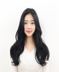

In [157]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리는 무엇일까요?
# 1. 리사이즈 (높이가 72, 너비가 59)  
# 2. 반드시 3채널이어야함.(컬러야함)   => 72,59,3
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이 부분은 스케일링 한 사람만 정확하게 할 수 있음.
#   => 여기서는 그냥 255로 나눈값임.
# 4. 텐서입력 shape로 변경해야함.  => (72,59,3) ==> (1,72,59,3)

from PIL import Image
img=Image.open('test3.jpg')
img=img.resize((59,72))   # PIL에서는 너비, 높이로 나옴.  텐서input은 높이,너비임
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
print(np.shape(newX))

print(class_names[np.argmax(model.predict(newX))])
img

In [163]:
# 가중치를 저장합니다
model.save_weights('./checkpoints/my_checkpoint')

# 가중치를 복원합니다
model.load_weights('./checkpoints/my_checkpoint')


female


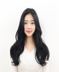

In [164]:
print(class_names[np.argmax(model.predict(newX))])
img

In [ ]:
# 이후 과적합 해소 작업 진행 후 모델 저장 필요

In [165]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)


170508288/170498071 [==============================] - 2s 0us/step


In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

# 입력 데이터는 (75, 75, 3)의 형태를 가집니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', 
                 activation = 'relu', input_shape = (72, 59, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', 
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', 
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', 
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dense(2, activation = 'softmax'))

In [175]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [176]:
history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
44/44 [==============================] - 45s 996ms/step - loss: 1.3009 - acc: 0.5721 - val_loss: 1.1643 - val_acc: 0.7350
Epoch 2/15
44/44 [==============================] - 44s 1s/step - loss: 1.0287 - acc: 0.7350 - val_loss: 0.9767 - val_acc: 0.7100
Epoch 3/15
44/44 [==============================] - 44s 996ms/step - loss: 0.9079 - acc: 0.7579 - val_loss: 0.9464 - val_acc: 0.6883
Epoch 4/15
44/44 [==============================] - 44s 993ms/step - loss: 0.8392 - acc: 0.7771 - val_loss: 0.8452 - val_acc: 0.7650
Epoch 5/15
44/44 [==============================] - 44s 995ms/step - loss: 0.7790 - acc: 0.7886 - val_loss: 0.7865 - val_acc: 0.7750
Epoch 6/15
44/44 [==============================] - 44s 1s/step - loss: 0.7251 - acc: 0.8193 - val_loss: 0.7406 - val_acc: 0.7967
Epoch 7/15
44/44 [==============================] - 46s 1s/step - loss: 0.6925 - acc: 0.8200 - val_loss: 0.7291 - val_acc: 0.8000
Epoch 8/15
44/44 [==============================] - 45s 1s/step - loss: 0.6573

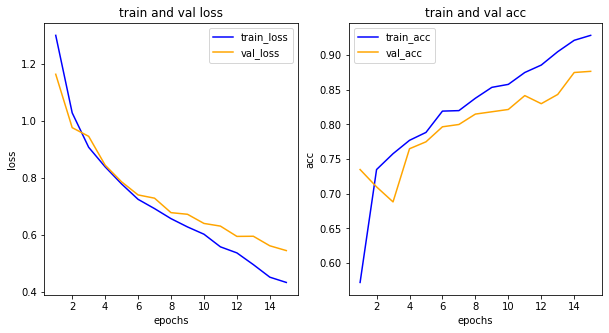

In [177]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

(72, 59, 3)
(72, 59, 3)
(1, 72, 59, 3)
female


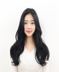

In [178]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리는 무엇일까요?
# 1. 리사이즈 (높이가 72, 너비가 59)  
# 2. 반드시 3채널이어야함.(컬러야함)   => 72,59,3
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이 부분은 스케일링 한 사람만 정확하게 할 수 있음.
#   => 여기서는 그냥 255로 나눈값임.
# 4. 텐서입력 shape로 변경해야함.  => (72,59,3) ==> (1,72,59,3)

from PIL import Image
img=Image.open('test3.jpg')
img=img.resize((59,72))   # PIL에서는 너비, 높이로 나옴.  텐서input은 높이,너비임
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
print(np.shape(newX))

print(class_names[np.argmax(model.predict(newX))])
img

(72, 59, 3)
(72, 59, 3)
(1, 72, 59, 3)
male


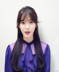

In [179]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리는 무엇일까요?
# 1. 리사이즈 (높이가 72, 너비가 59)  
# 2. 반드시 3채널이어야함.(컬러야함)   => 72,59,3
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이 부분은 스케일링 한 사람만 정확하게 할 수 있음.
#   => 여기서는 그냥 255로 나눈값임.
# 4. 텐서입력 shape로 변경해야함.  => (72,59,3) ==> (1,72,59,3)

from PIL import Image
img=Image.open('test2.jpg')
img=img.resize((59,72))   # PIL에서는 너비, 높이로 나옴.  텐서input은 높이,너비임
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
print(np.shape(newX))

print(class_names[np.argmax(model.predict(newX))])
img